# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import ndimage
from sklearn.utils import shuffle
from skimage import exposure

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load pickled data
import pickle
import os.path

def load_data(file):
    with open(file, mode='rb') as f:
        obj = pickle.load(f)
    print('Data is loaded from {0}'.format(file))
    return obj['features'], obj['labels'].astype(int)


# method for storing datasets (for example for augment data)
def store_data(X, y, file):
    obj = {'features': X, 'labels': y}
    if os.path.isfile(file) :
        print('Error: file {0} already exists.'.format(file))
        
    with open(file, mode='wb+') as f:
        pickle.dump(obj, f)
        print('Data is stored into {0}'.format(file))


training_file = 'data/origin/train.p'
validation_file= 'data/origin/valid.p'
testing_file = 'data/origin/test.p'

X_train_orig, y_train_orig = load_data(training_file)
X_valid_orig, y_valid_orig = load_data(validation_file)
X_test_orig, y_test_orig = load_data(testing_file)

Data is loaded from data/origin/train.p
Data is loaded from data/origin/valid.p
Data is loaded from data/origin/test.p


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
signnames_file = 'signnames.csv'
signnames_data = pd.DataFrame.from_csv(signnames_file)

print ('Rows: ' + str(signnames_data.shape[0]))

Rows: 43


In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = X_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train_orig.shape[1:])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train_orig).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

def visualize_data(X, y, visualize_class_num=5, cmap=None):
    if cmap == 'gray':
        X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
        
    classes = np.unique(y)
    num_classes = classes.size
    
    fig, axes = plt.subplots(nrows=num_classes, ncols=visualize_class_num, figsize=(visualize_class_num*4, num_classes*2))
        
    plt.setp(axes.flat, xticks=[], yticks=[])

    for c, plt_row in zip(classes, axes):
        if visualize_class_num == 1:
            plt_row = np.array([plt_row])
            
        indices = np.where(y == c)[0]
        indices = np.random.choice(indices, visualize_class_num)
        X_filtered_by_class = X[indices]
        if len(X_filtered_by_class) < 1:
            continue
        
        images = X_filtered_by_class

        plt_row[0].set_title('Class ' + str(c) + ': ' + signnames_data.get_value(c, 'SignName'), size=12)

        for img, col_idx in zip(images, range(visualize_class_num)):
            plt_row[col_idx].imshow(img, cmap=cmap)

    plt.tight_layout()

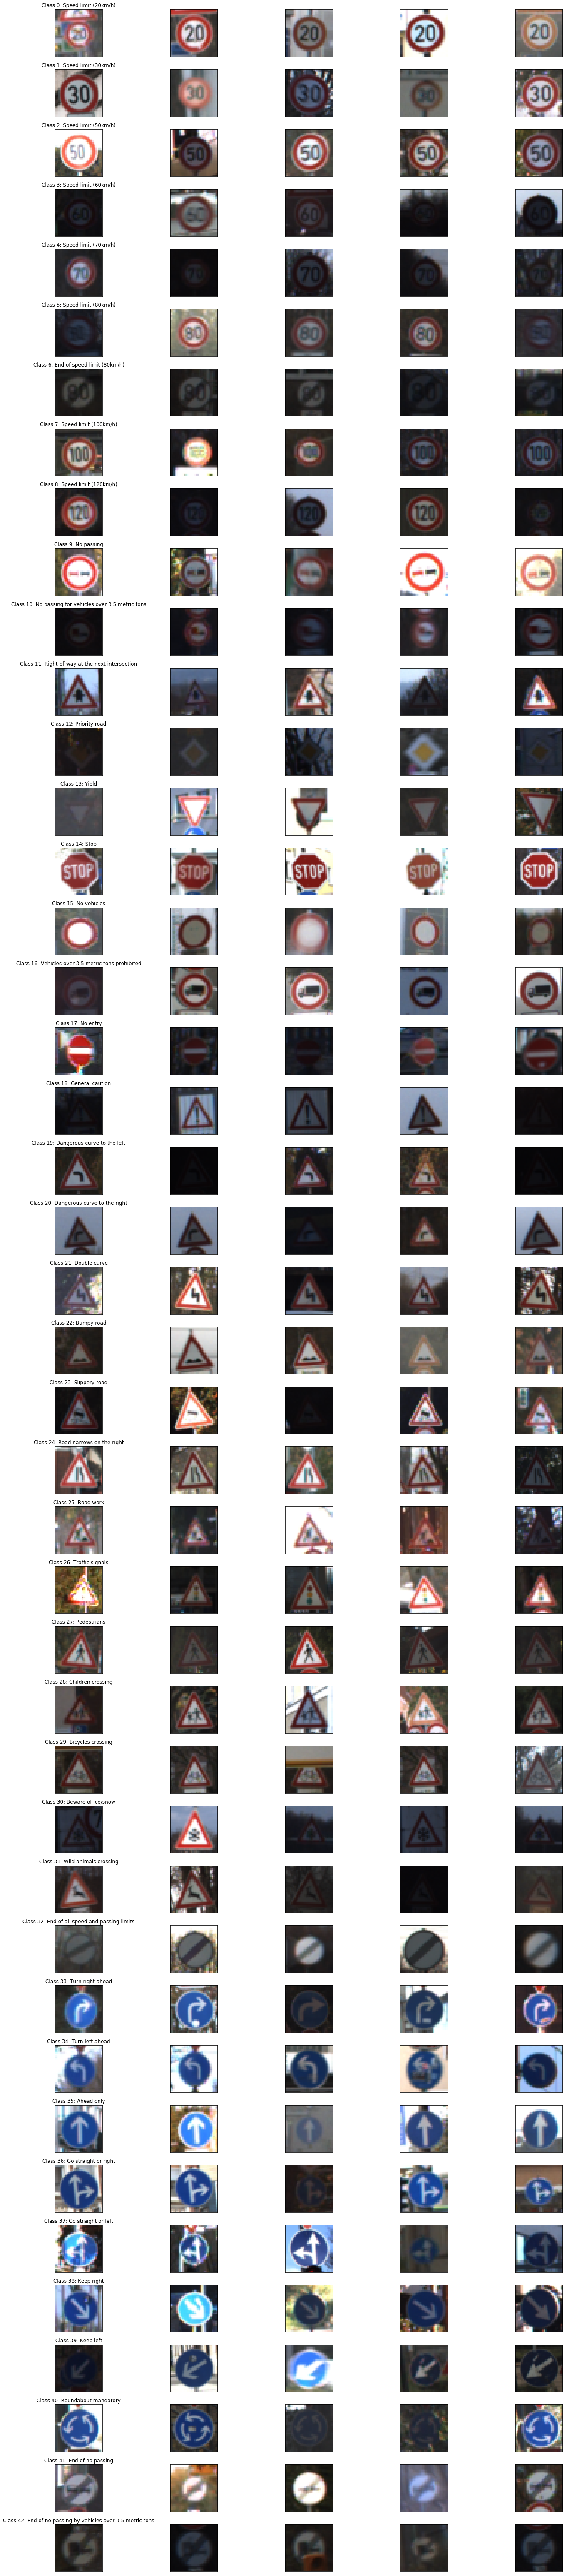

In [6]:
visualize_data(X_train_orig, y_train_orig, visualize_class_num=5)

### Check balance of the Dataset

In [7]:
def check_balance(dataset_labels, dataset_name, num_classes):
    items_per_classes = []

    for c in range(num_classes):
        items_per_classes.append(len(dataset_labels[dataset_labels == c]))

    plt.figure()
    plt.bar(np.arange(num_classes), items_per_classes)
    max_items_per_classes = max(items_per_classes)
    plt.axis([0, num_classes, 0, 1.1 * max_items_per_classes])
    plt.title("Number of samples for each class for " + dataset_name + '. Total #: ' + str(np.sum(items_per_classes, axis=0)))
    plt.grid(True)

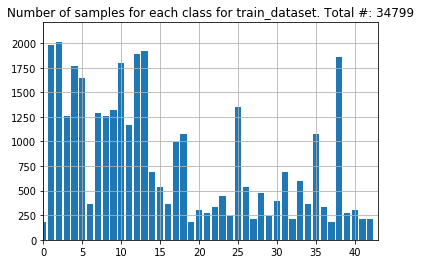

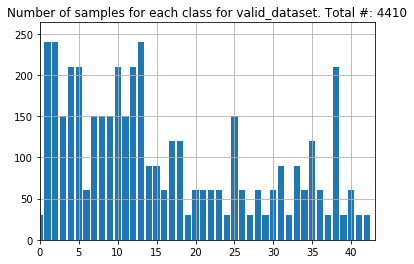

In [8]:
# we expect the data to be balanced across classes.
check_balance(y_train_orig, 'train_dataset', n_classes)
check_balance(y_valid_orig, 'valid_dataset', n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Generate Augment Dataset

In [9]:
from AugmentData import augment_data

aug_train_file = 'data/aug_1000/train.p'
aug_valid_file= 'data/aug_1000/valid.p'


if os.path.isfile(aug_train_file) :
    print('Load Augment X_train')
    X_train_orig_aug, y_train_aug = load_data(aug_train_file)
else:
    print('Augment X_train')
    X_train_orig_gray = rgb2gray(X_train_orig / 255.0)
    min_num_per_class = 1000
    target_total_samples_count = n_classes*min_num_per_class
    X_train_orig_aug, y_train_aug = augment_data(X_train_orig_gray, y_train_orig, n_classes, target_total_samples_count)
    # store Augment dataset if need
    #store_data(X_train_orig_aug, y_train_aug, aug_train_file)


print('')

if os.path.isfile(aug_valid_file) :
    print('Load Augment X_valid')
    X_valid_orig_aug, y_valid_aug = load_data(aug_valid_file)
else:
    print('Augment X_valid')
    X_valid_orig_gray = rgb2gray(X_valid_orig / 255.0)
    min_num_per_class = 100
    target_total_samples_count = n_classes*min_num_per_class
    X_valid_orig_aug, y_valid_aug = augment_data(X_valid_orig_gray, y_valid_orig, n_classes, target_total_samples_count)
    # store Augment dataset if need
    #store_data(X_valid_orig_aug, y_valid_aug, aug_valid_file)

Load Augment X_train
Data is loaded from data/aug_1000/train.p

Load Augment X_valid
Data is loaded from data/aug_1000/valid.p


#### Check Balance of the Augment Dataset

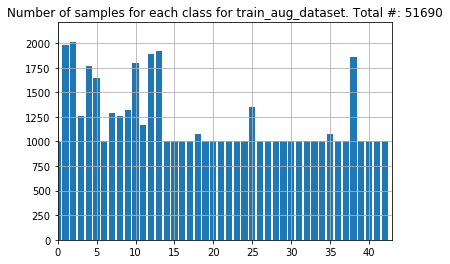

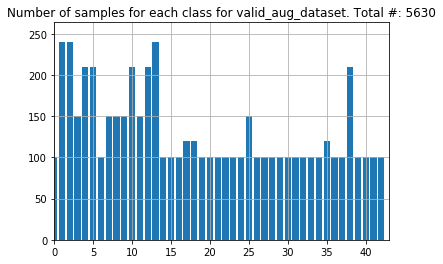

In [10]:
check_balance(y_train_aug, 'train_aug_dataset', n_classes)
check_balance(y_valid_aug, 'valid_aug_dataset', n_classes)

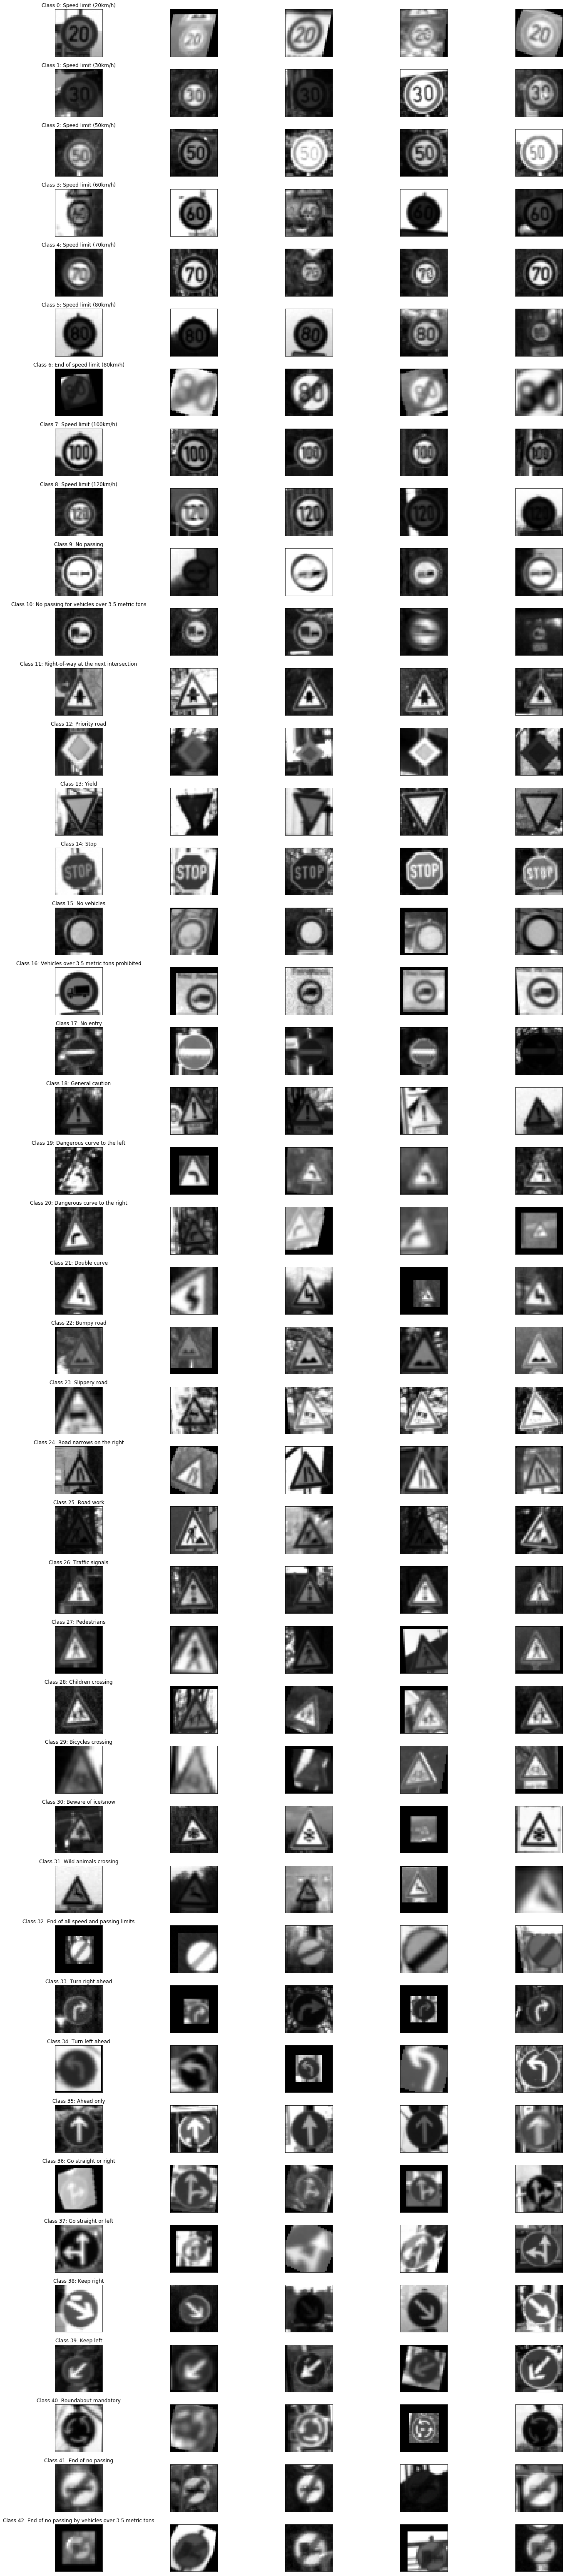

In [11]:
visualize_data(X_train_orig_aug, y_train_aug, cmap='gray')

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def rgb2gray(rgb):
    # https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    # Y' = 0.299 R + 0.587 G + 0.114 B
    result = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return result.reshape((rgb.shape[0], rgb.shape[1], rgb.shape[2], 1))

def base_preprocess(dataset, hist_eq=True):
    if issubclass(dataset.dtype.type, np.integer):
        dataset = dataset / 255.0
    
    # convert to rgb only if dataset is not gray already
    if dataset.shape[3] == 3 or dataset.shape[3] == 4:
        dataset = rgb2gray(dataset)
    
    if hist_eq:
        dataset = exposure.equalize_hist(dataset)
        
    return dataset

def stats_preprocess(dataset, mean, std):
    # zero-centering
    dataset -= mean
    
    # normalization
    dataset /= (std + 1e-8)
    
    return dataset

def full_preprocess(dataset, mean, std):
    dataset = base_preprocess(dataset)
    dataset = stats_preprocess(dataset, mean, std)
    return dataset


#### BasePreProcessing

BasePreProcessing has the following steps:
* converting [0-255] range to [0-1]
* RGB -> GRAY
* HistogramEqualization

In [13]:
# BasePreprocessing for Origin Data
X_train = base_preprocess(np.copy(X_train_orig))
y_train = y_train_orig
X_valid = base_preprocess(np.copy(X_valid_orig))
y_valid = y_valid_orig
X_test = base_preprocess(np.copy(X_test_orig))
y_test = y_test_orig

# BasePreprocessing for Augment Data
X_train_aug = base_preprocess(np.copy(X_train_orig_aug))
#y_train_aug = y_train_aug
X_valid_aug = base_preprocess(np.copy(X_valid_orig_aug))
#y_valid_aug = y_valid_aug
# We make copy of Test dataset for Augment Data too, cause we PreProcess it using stats of X_train_aug
X_test_aug = np.copy(X_test)
y_test_aug = y_test_orig
    
# print some stats
print('X_train.mean: {0}'.format(X_train.mean()))
print('X_train.min: {0}'.format(X_train.min()))
print('X_train.max: {0}'.format(X_train.max()))
print('')
print('X_train_aug.mean: {0}'.format(X_train_aug.mean()))
print('X_train_aug.min: {0}'.format(X_train_aug.min()))
print('X_train_aug.max: {0}'.format(X_train_aug.max()))

X_train.mean: 0.5036880598151146
X_train.min: 1.0046535101583379e-05
X_train.max: 1.0

X_train_aug.mean: 0.5043249505152041
X_train_aug.min: 0.05222194890815438
X_train_aug.max: 1.0


#### StatsPreProcessing
After **BasePreProcessing** we compute MEAN and STDDEV of TEST Datasets, and then using MEAN and STDDEV we make **StatsPreProcessing**:
* zero-centering (subtracting the MEAN)
* normalization (dividing by STDDEV)


In [14]:
# 1) PreProcess for Origin Dataset
train_orig_mean = np.mean(X_train)
train_orig_std = np.std(X_train, axis=0)

X_train = stats_preprocess(np.copy(X_train), train_orig_mean, train_orig_std)
X_valid = stats_preprocess(np.copy(X_valid), train_orig_mean, train_orig_std)
X_test = stats_preprocess(np.copy(X_test), train_orig_mean, train_orig_std)

# 2) PreProcess for Augment Dataset
train_aug_mean = np.mean(X_train_aug)
train_aug_std = np.std(X_train_aug, axis=0)

X_train_aug = stats_preprocess(np.copy(X_train_aug), train_aug_mean, train_aug_std)
X_valid_aug = stats_preprocess(np.copy(X_valid_aug), train_aug_mean, train_aug_std)
X_test_aug = stats_preprocess(np.copy(X_test_aug), train_aug_mean, train_aug_std)

# print some stats
print('X_train.mean: {0}'.format(X_train.mean()))
print('X_train.min: {0}'.format(X_train.min()))
print('X_train.max: {0}'.format(X_train.max()))
print('')
print('X_train_aug.mean: {0}'.format(X_train_aug.mean()))
print('X_train_aug.min: {0}'.format(X_train_aug.min()))
print('X_train_aug.max: {0}'.format(X_train_aug.max()))

X_train.mean: 0.0046231018278297484
X_train.min: -1.989431208556963
X_train.max: 1.9624342688660474

X_train_aug.mean: 0.012626970066928152
X_train_aug.min: -1.8695090909301082
X_train_aug.max: 2.049628789543405


### Let's check data cloud of the Origin and of the Preprocessed data


In [15]:
def plot_features(feature1, feature2, plt_col):
    plt_col.axhline(0, color='black')
    plt_col.axvline(0, color='black')
    
    scale = 1.1
    max_f1 = scale*abs(max(feature1.min(), feature1.max(), key=abs))
    max_f2 = scale*abs(max(feature2.min(), feature2.max(), key=abs))
    plt_col.axis([-max_f1, max_f1, -max_f2, max_f2])
    
    plt_col.plot(feature1, feature2, 'ro')
    
def plot_data_clouds(orig_data, pp_data, pp_data_without_hist_eq, data_indices, f1_indices, f2_indices):
    orig_f1 = orig_data[data_indices,f1_indices[0],f1_indices[1]]
    orig_f2 = orig_data[data_indices,f2_indices[0],f2_indices[1]]
    
    pp_f1 = pp_data[data_indices,f1_indices[0],f1_indices[1]]
    pp_f2 = pp_data[data_indices,f2_indices[0],f2_indices[1]]
    
    pp_without_hist_eq_f1 = pp_data_without_hist_eq[data_indices,f1_indices[0],f1_indices[1]]
    pp_without_hist_eq_f2 = pp_data_without_hist_eq[data_indices,f2_indices[0],f2_indices[1]]
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    
    plt_col1 = axes[0]
    plt_col1.set_title('Origin Data')
    plot_features(orig_f1, orig_f2, plt_col1)
    
    plt_col2 = axes[1]
    plt_col2.set_title('PreProcessed Data')
    plot_features(pp_f1, pp_f2, plt_col2)
    
    plt_col3 = axes[2]
    plt_col3.set_title('PreProcessed Data without HistEq')
    plot_features(pp_without_hist_eq_f1, pp_without_hist_eq_f2, plt_col3)    
    
    plt.tight_layout()
    

In [16]:
# randomly select 100 samples with 2 random features
num_vis = 100
vis_indices = np.random.choice(X_train_orig.shape[0], num_vis)
#features_indices1 = np.random.choice(X_train_orig.shape[1], 2)
#features_indices2 = np.random.choice(X_train_orig.shape[2], 2)
features_indices1 = [24, 9]
features_indices2 = [17, 22]


print('features_indices1: {0}'.format(features_indices1))
print('features_indices2: {0}'.format(features_indices2))

features_indices1: [24, 9]
features_indices2: [17, 22]


X_train_not_hist_eq.mean: -3.6074096859678724e-15
X_train_not_hist_eq.min: -1.1870372507221043
X_train_not_hist_eq.max: 2.6171659092035795


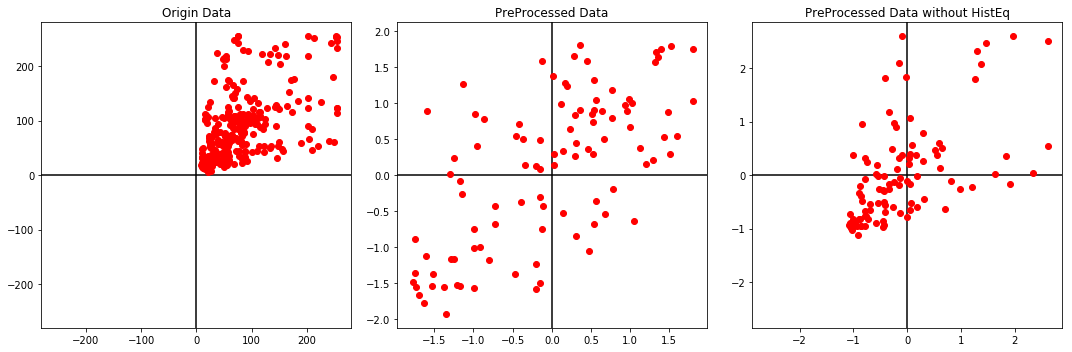

In [17]:
X_train_not_hist_eq = base_preprocess(np.copy(X_train_orig), hist_eq=False)
X_train_not_hist_eq = stats_preprocess(np.copy(X_train_not_hist_eq), X_train_not_hist_eq.mean(), X_train_not_hist_eq.std())
print('X_train_not_hist_eq.mean: {0}'.format(X_train_not_hist_eq.mean()))
print('X_train_not_hist_eq.min: {0}'.format(X_train_not_hist_eq.min()))
print('X_train_not_hist_eq.max: {0}'.format(X_train_not_hist_eq.max()))

plot_data_clouds(X_train_orig, X_train, X_train_not_hist_eq, vis_indices, features_indices1, features_indices2)

X_train_aug_not_hist_eq.mean: -1.030838534414002e-15
X_train_aug_not_hist_eq.min: -1.1871989212227716
X_train_aug_not_hist_eq.max: 2.7555159674927467


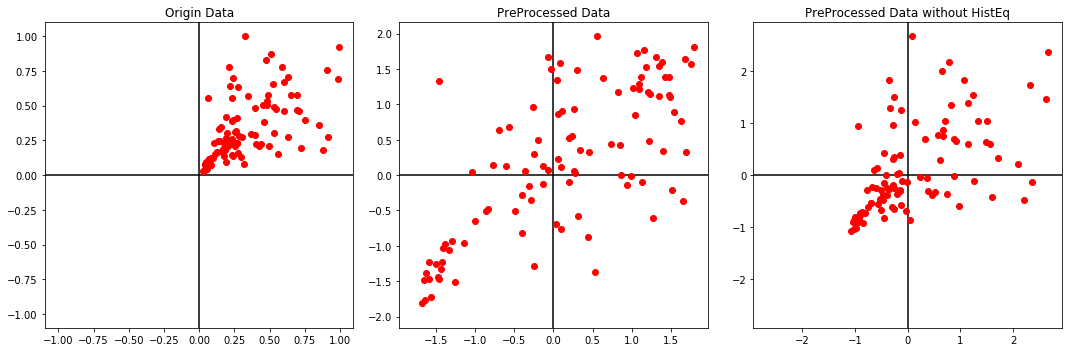

In [18]:
X_train_aug_not_hist_eq = base_preprocess(np.copy(X_train_orig_aug), hist_eq=False)
X_train_aug_not_hist_eq = stats_preprocess(np.copy(X_train_aug_not_hist_eq), X_train_aug_not_hist_eq.mean(), X_train_aug_not_hist_eq.std())
print('X_train_aug_not_hist_eq.mean: {0}'.format(X_train_aug_not_hist_eq.mean()))
print('X_train_aug_not_hist_eq.min: {0}'.format(X_train_aug_not_hist_eq.min()))
print('X_train_aug_not_hist_eq.max: {0}'.format(X_train_aug_not_hist_eq.max()))

plot_data_clouds(X_train_orig_aug, X_train_aug, X_train_aug_not_hist_eq, vis_indices, features_indices1, features_indices2)

The Preprocessed data cloud is centered around the origin (due to subtracting the mean and HistogramEqualization) 
and additionally scaled by standard deviation.

### Define methods for plotting accuracy and loss curves

In [19]:
def plot_history_curve(plt_col, train_values, valid_values, title, ylabel, xlabel):
    plt_col.plot(train_values)
    plt_col.plot(valid_values)
    plt_col.set_title(title)
    plt_col.set_ylabel(ylabel)
    plt_col.set_xlabel(xlabel)
    plt_col.legend(['train', 'valid'], loc='upper left')
    #plt.savefig('./accuracy_curve.png')
    
    
def plot_history_curves(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    plt_col1 = axes[0]
    plot_history_curve(plt_col1, history['train_acc'], history['valid_acc'], 'model accuracy', 'accuracy', 'epoch')
    
    plt_col2 = axes[1]
    plot_history_curve(plt_col2, history['train_loss'], history['valid_loss'], 'model loss', 'loss', 'epoch')
    
    plt.tight_layout()
    

### Model Architecture

Use LeNet defined in an external python source LeNet.py

In [20]:
from LeNet import LeNetConfig, LeNet

num_classes = n_classes
input_dim = X_train.shape[1:]

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [22]:
final_params = {
            'conv': [{'num_filters': 16, 'filter_size': 3, 'pool_size': 0, },
                     {'num_filters': 16, 'filter_size': 3, },
                     {'num_filters': 64, 'filter_size': 3, 'pool_size': 0},
                     {'num_filters': 64, 'filter_size': 3, }
                    ],
            'fc': [256, 256],
            'lr_start': 1e-3, 
            'l2': 1e-3, 
            'dropout_prob': 0.25, 
            'batch_size': 64
}


num_epochs = 100
final_lenet_config = LeNetConfig(input_dim, num_classes, final_params)
final_lenet = LeNet(final_lenet_config)
#(final_history, final_valid_loss, final_valid_accuracy) = final_lenet.fit(X_train, y_train, X_valid, y_valid, num_epochs)
(final_history, final_valid_loss, final_valid_accuracy) = final_lenet.fit(X_train_aug, y_train_aug, X_valid_aug, y_valid_aug, num_epochs)
final_lenet.save('./nets/final_aug_lenet_100/net.ckpt')
#tf.train.latest_checkpoint('./nets/')

Training...

EPOCH 1 ...
Train Loss: 4.665836
Train Accuracy = 0.601
Validation Loss = 2.314
Validation Accuracy = 0.602

EPOCH 2 ...
Train Loss: 2.172023
Train Accuracy = 0.898
Validation Loss = 1.129
Validation Accuracy = 0.893

EPOCH 3 ...
Train Loss: 1.427169
Train Accuracy = 0.937
Validation Loss = 0.861
Validation Accuracy = 0.923

EPOCH 4 ...
Train Loss: 1.143045
Train Accuracy = 0.960
Validation Loss = 0.732
Validation Accuracy = 0.947

EPOCH 5 ...
Train Loss: 0.992489
Train Accuracy = 0.968
Validation Loss = 0.678
Validation Accuracy = 0.951

EPOCH 6 ...
Train Loss: 0.901502
Train Accuracy = 0.974
Validation Loss = 0.636
Validation Accuracy = 0.955

EPOCH 7 ...
Train Loss: 0.835523
Train Accuracy = 0.978
Validation Loss = 0.619
Validation Accuracy = 0.958

EPOCH 8 ...
Train Loss: 0.801841
Train Accuracy = 0.981
Validation Loss = 0.578
Validation Accuracy = 0.965

EPOCH 9 ...
Train Loss: 0.766553
Train Accuracy = 0.983
Validation Loss = 0.575
Validation Accuracy = 0.963

EPOCH 

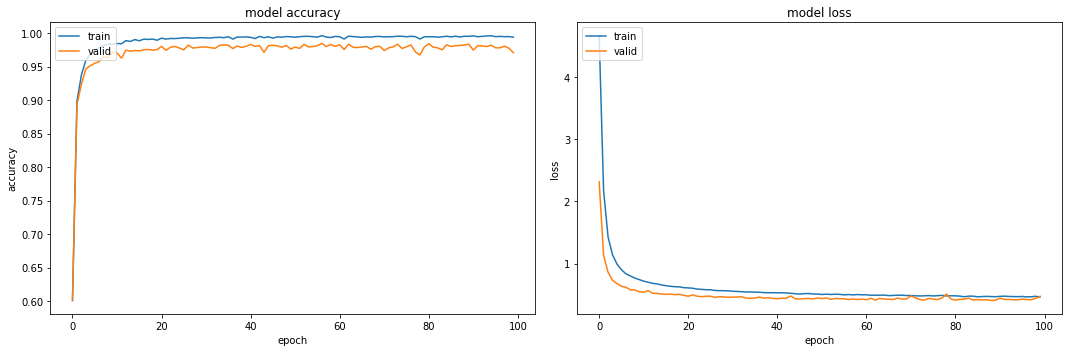

In [23]:
plot_history_curves(final_history)

In [47]:
test_accuracy = final_lenet.eval_accuracy(X_test_aug, y_test_aug)
print("*************** Test Accuracy: {:.1f}% *****************".format(test_accuracy*100))

*************** Test Accuracy: 98.1% *****************


In [48]:
train_accuracy = final_lenet.eval_accuracy(X_train_aug, y_train_aug)
print("*************** Train Accuracy: {:.1f}% *****************".format(train_accuracy*100))

*************** Train Accuracy: 99.6% *****************


In [49]:
valid_accuracy = final_lenet.eval_accuracy(X_valid_aug, y_valid_aug)
print("*************** Valid Accuracy: {:.1f}% *****************".format(valid_accuracy*100))

*************** Valid Accuracy: 98.5% *****************


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

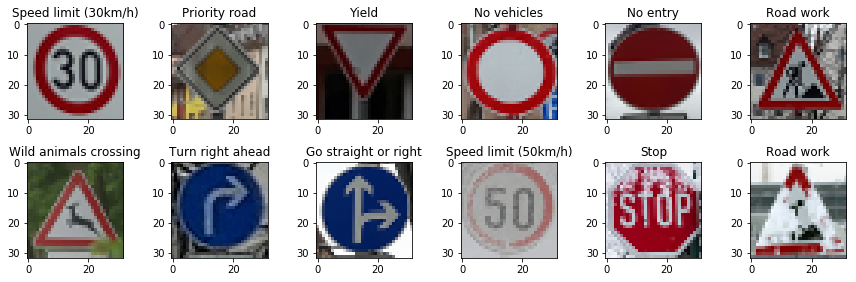

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import math

web_images_dir = 'data/web/'
web_images_names = ['01-speed-limit-30-1.png', '12-priority-road-1.png', '13-yield-1.png',
              '15-no-vehicles-1.png', '17-no-entry-1.png', '25-road-work-1.png',
              '31-wild-animals-crossing-1.png', '33-turn-right-ahead-1.png', '36-go-straight-or-right-1.png',
              '02-speed-limit-50-snow-1.png', '14-stop-snow-1.png', '25-road-work-snow-2.png'
             ]
web_images_classes = np.array([1, 12, 13, 15, 17, 25, 31, 33, 36, 2, 14, 25])

web_images = []
for img_name in web_images_names:
    web_images.append(mpimg.imread(web_images_dir + img_name))
web_images = np.array(web_images)

num_web_samples = web_images.shape[0]
images_per_row = 6
num_rows = int(math.ceil(num_web_samples / images_per_row))
fig, axes = plt.subplots(nrows=num_rows, ncols=images_per_row, figsize=(12, 4))
for row_idx, plt_row in zip(range(num_rows), axes):
    for col_idx in range(images_per_row):
        idx = row_idx*images_per_row + col_idx
        if idx < num_web_samples:
            plt_row[col_idx].set_title('{0}'.format(signnames_data.get_value(web_images_classes[idx], 'SignName')))
            plt_row[col_idx].imshow(web_images[idx])
        else:
            break

plt.tight_layout()   


### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_web = full_preprocess(np.copy(web_images), train_aug_mean, train_aug_std)
y_web = np.copy(web_images_classes)

y_web_predicted = final_lenet.predict_class(X_web)

print('Real Classes:      {0}'.format(y_web))
print('Predicted Classes: {0}'.format(y_web_predicted))

Real Classes:      [ 1 12 13 15 17 25 31 33 36  2 14 25]
Predicted Classes: [ 1 12 13 15 17 25 31 33 36  4 14 22]


### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
web_accuracy = final_lenet.eval_accuracy(X_web, y_web)
print("*************** Web Images Accuracy: {:.1f}% *****************".format(web_accuracy*100))

*************** Web Images Accuracy: 83.3% *****************


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

In [44]:
top_k = 5
web_top_5 = final_lenet.top_k_probabilities(X_web, 5)
print('The top five softmax probabilities of the predictions:')
print(web_top_5)
web_top_probs, web_top_classes = web_top_5
num_web_samples = X_web.shape[0]

The top five softmax probabilities of the predictions:
TopKV2(values=array([[  9.98381376e-01,   9.24295804e-04,   3.54047894e-04,
          2.37584172e-04,   2.39322344e-05],
       [  1.00000000e+00,   5.29406829e-09,   2.31226926e-09,
          8.33337510e-10,   8.29180336e-10],
       [  9.99976754e-01,   1.30643803e-05,   3.11950612e-06,
          2.14614715e-06,   1.07822473e-06],
       [  9.99812305e-01,   6.11248688e-05,   4.00297067e-05,
          2.83059217e-05,   2.45147730e-05],
       [  9.99975204e-01,   7.83160249e-06,   5.54689632e-06,
          5.25347923e-06,   1.88829847e-06],
       [  1.00000000e+00,   1.01756609e-16,   5.74044940e-19,
          4.82999859e-19,   1.88032525e-19],
       [  1.00000000e+00,   8.99759813e-13,   3.53391524e-13,
          2.41819504e-13,   1.28402917e-13],
       [  9.99998927e-01,   1.98471525e-07,   1.71355737e-07,
          1.45052354e-07,   1.42148593e-07],
       [  1.00000000e+00,   4.24540296e-08,   2.74502354e-09,
          1.6

In [50]:
# Get by one sample for each class
X_classes = np.array([None]*num_classes)
for c in range(num_classes):
    indices = np.where(y_test_orig == c)[0][0]
    X_classes[c] = X_test_orig[indices]

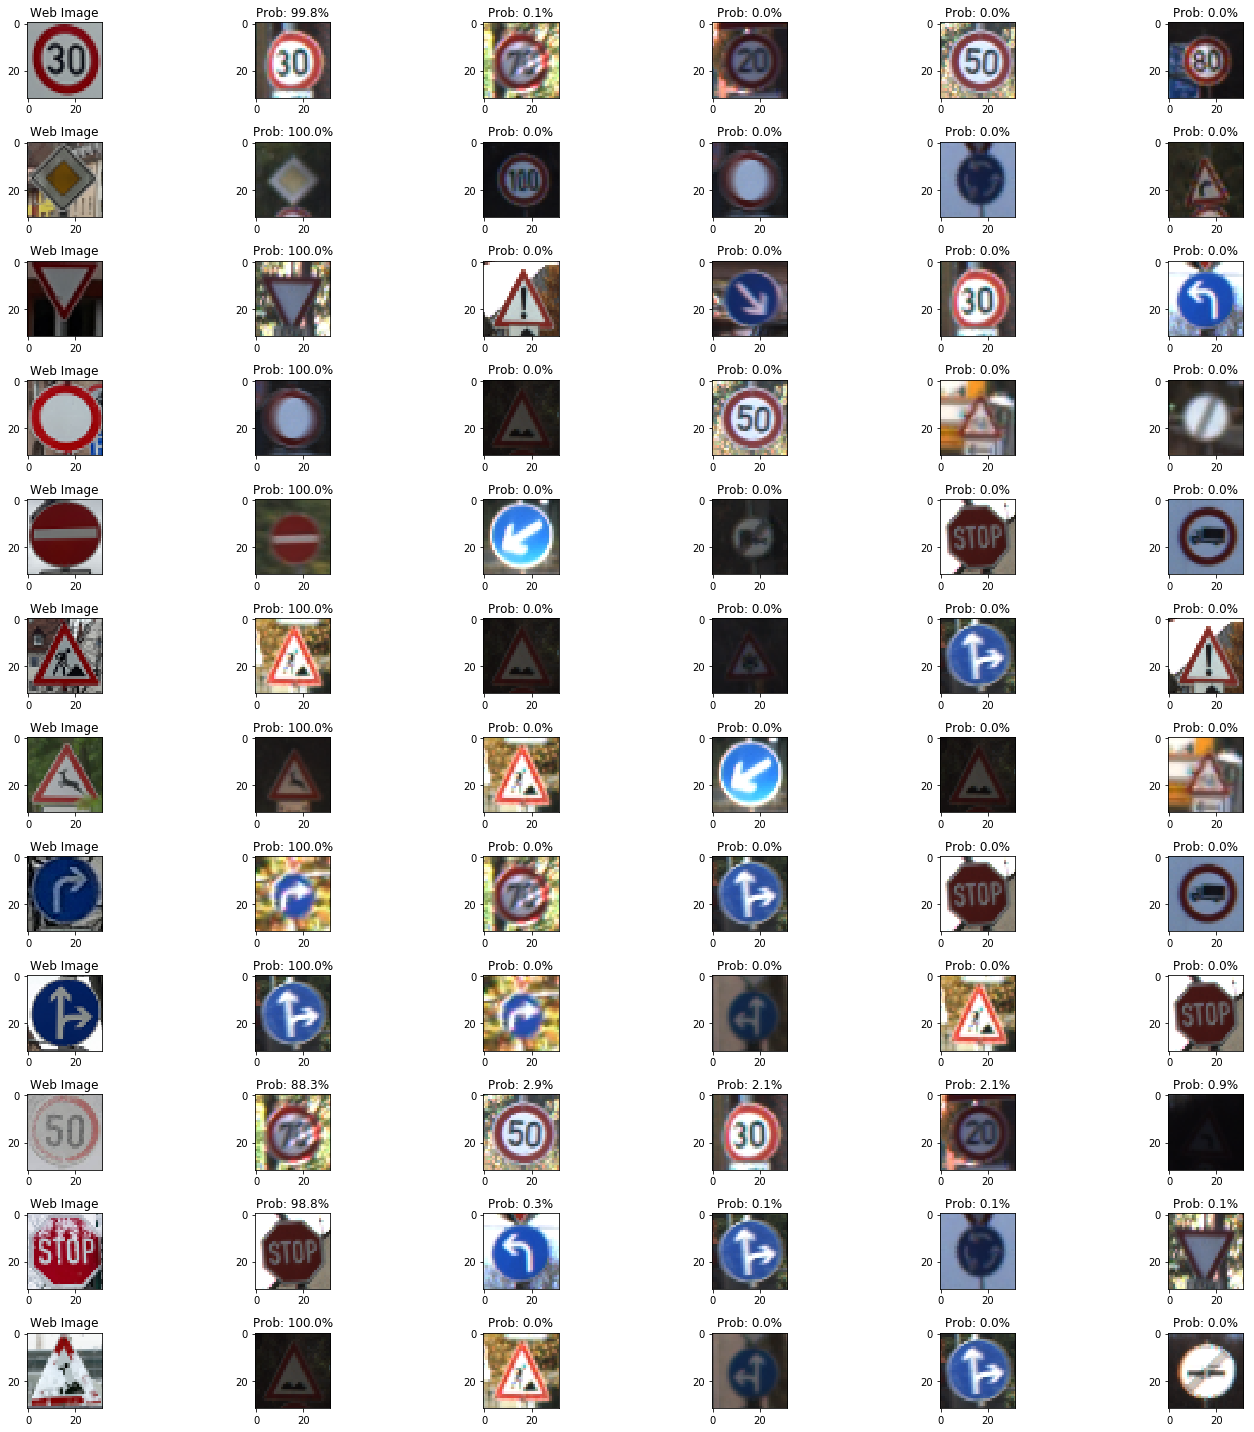

In [63]:
fig, axes = plt.subplots(nrows=num_web_samples, ncols=top_k+1, figsize=(20, 20))
        
for img_idx, plt_row in zip(range(num_web_samples), axes):
    # Origin Image
    plt_row[0].set_title('Web Image')
    plt_row[0].imshow(web_images[img_idx])
    
    # BarChart of Prediction Probabilites
    #plt_row[1].bar(web_top_classes[img_idx], web_top_probs[img_idx])
    #plt_row[1].grid(True)
    
    # Predictions
    for prob_idx in range(top_k):
        plt_row[prob_idx+1].set_title('Prob: {:.1f}%'.format(web_top_probs[img_idx][prob_idx]*100))
        plt_row[prob_idx+1].imshow(X_classes[web_top_classes[img_idx][prob_idx]])

plt.tight_layout()   

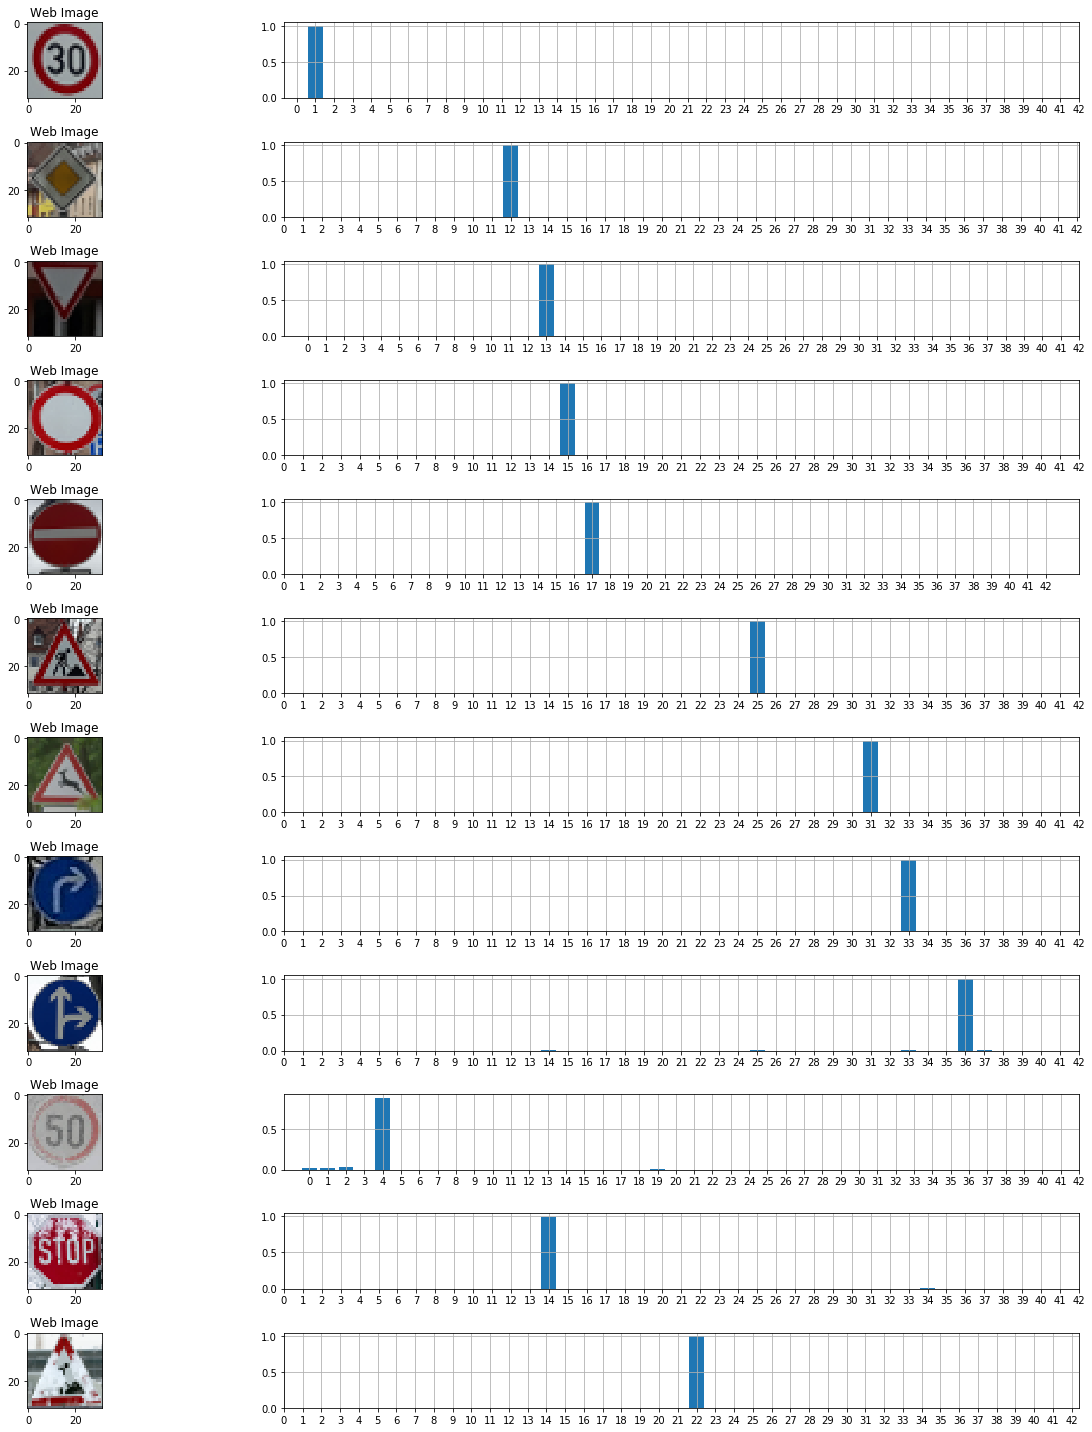

In [61]:
fig, axes = plt.subplots(nrows=num_web_samples, ncols=2, figsize=(20, 20))
        
for img_idx, plt_row in zip(range(num_web_samples), axes):
    # Origin Image
    plt_row[0].set_title('Web Image')
    plt_row[0].imshow(web_images[img_idx])
    
    # BarChart of Prediction Probabilites
    plt_row[1].bar(web_top_classes[img_idx], web_top_probs[img_idx])
    plt_row[1].set_xticks(range(0, num_classes))
    plt_row[1].grid(True)
    
    # Predictions
    #for prob_idx in range(top_k):
    #    plt_row[prob_idx+2].set_title('Prob: {:.1f}%'.format(web_top_probs[img_idx][prob_idx]*100))
    #    plt_row[prob_idx+2].imshow(X_classes[web_top_classes[img_idx][prob_idx]])

plt.tight_layout()   

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, leNet, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = np.reshape(image_input, (1,*image_input.shape))
    #image_input = rgb2gray(image_input / 255.0)
    #image_input = preprocess_chain(image_input)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = leNet.activation(image_input, tf_activation)
    featuremaps = activation.shape[3]
    #print(activation.shape)
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

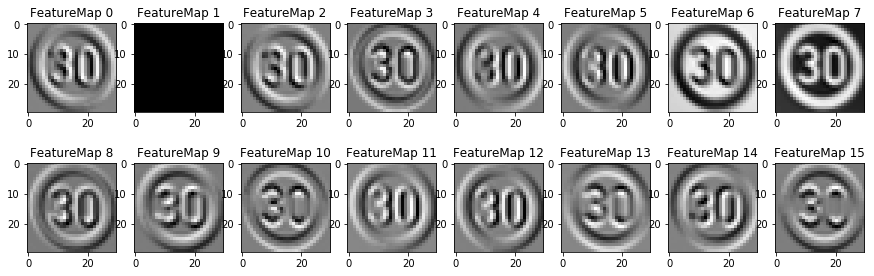

In [30]:
outputFeatureMap(X_web[0], final_lenet, 'conv_1')

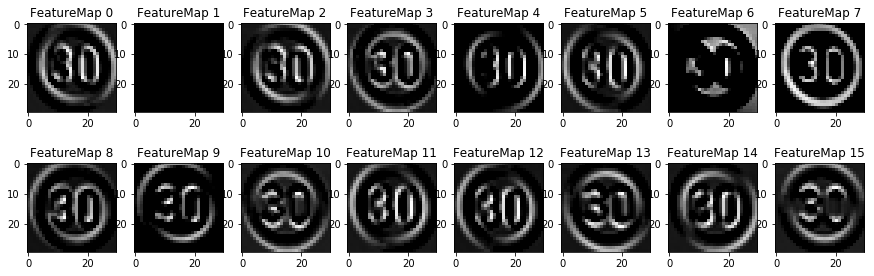

In [31]:
outputFeatureMap(X_web[0], final_lenet, 'conv_1_relu')

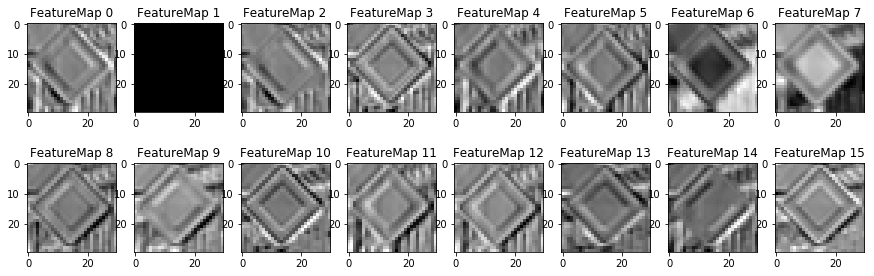

In [32]:
outputFeatureMap(X_web[1], final_lenet, 'conv_1')

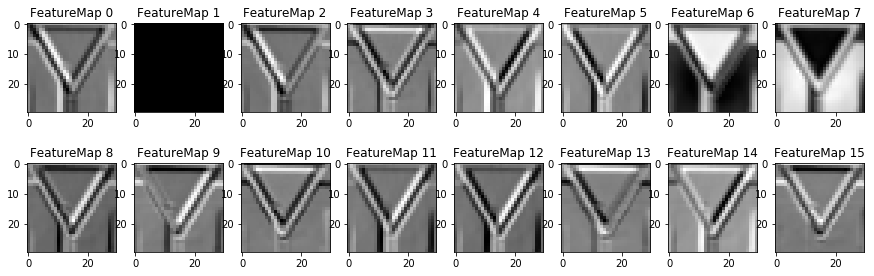

In [33]:
outputFeatureMap(X_web[2], final_lenet, 'conv_1')

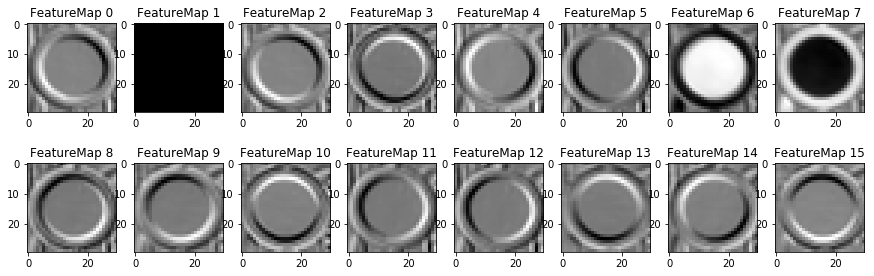

In [34]:
outputFeatureMap(X_web[3], final_lenet, 'conv_1')

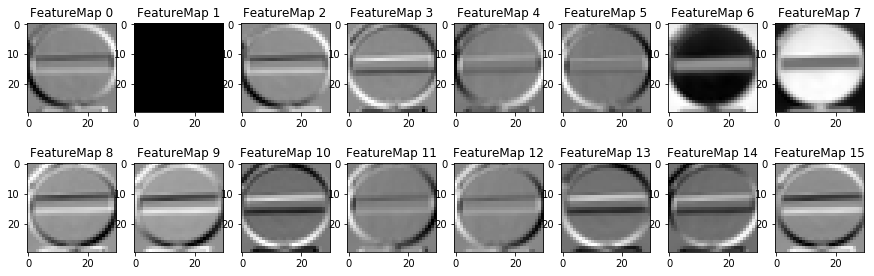

In [35]:
outputFeatureMap(X_web[4], final_lenet, 'conv_1')

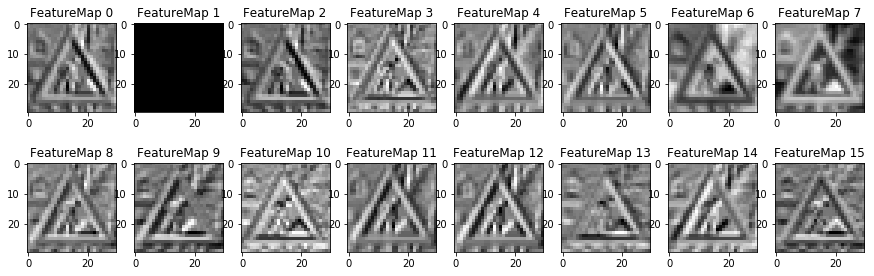

In [36]:
outputFeatureMap(X_web[5], final_lenet, 'conv_1')

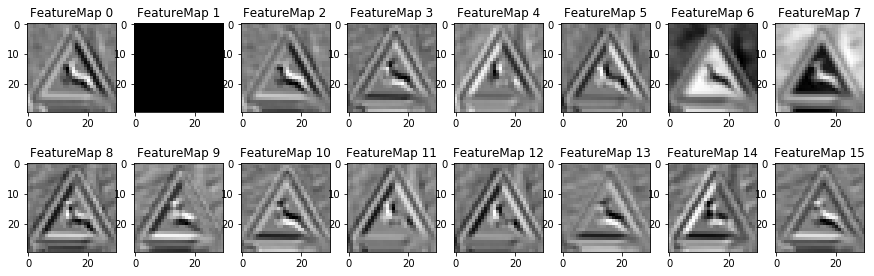

In [37]:
outputFeatureMap(X_web[6], final_lenet, 'conv_1')

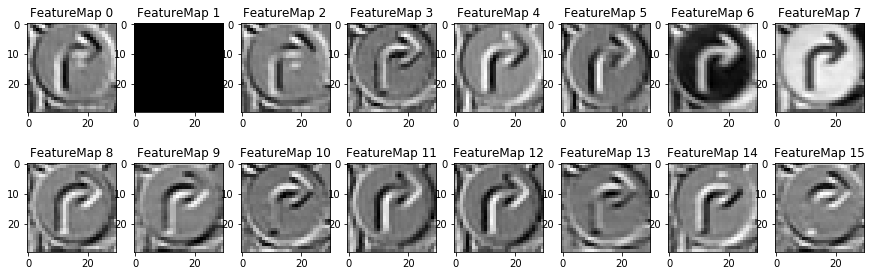

In [38]:
outputFeatureMap(X_web[7], final_lenet, 'conv_1')

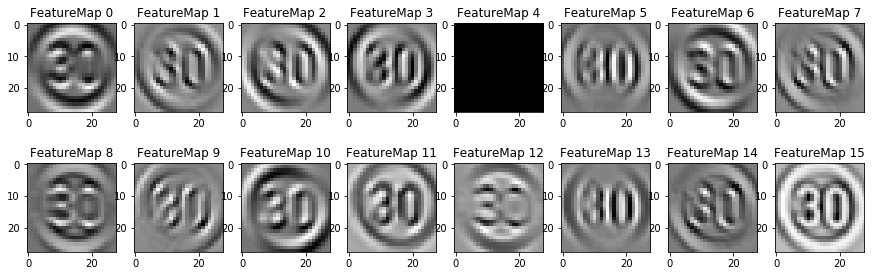

In [39]:
outputFeatureMap(X_web[0], final_lenet, 'conv_2')

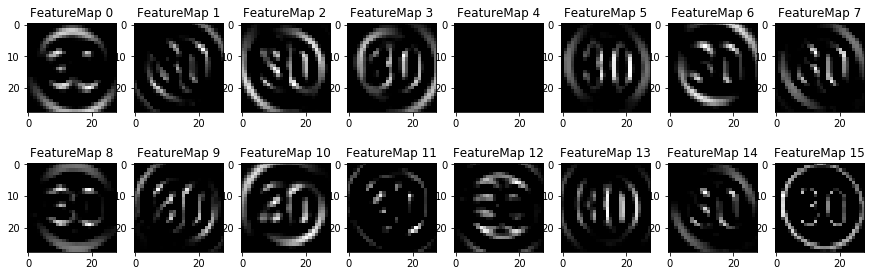

In [40]:
outputFeatureMap(X_web[0], final_lenet, 'conv_2_relu')

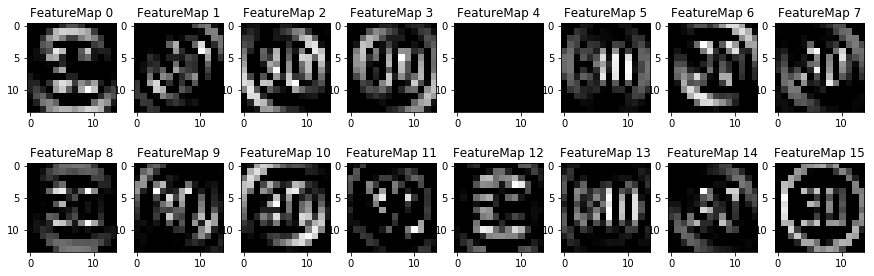

In [41]:
outputFeatureMap(X_web[0], final_lenet, 'conv_2_pool')

In [43]:
#outputFeatureMap(X_web[0], final_lenet, 'conv_3_relu')

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 